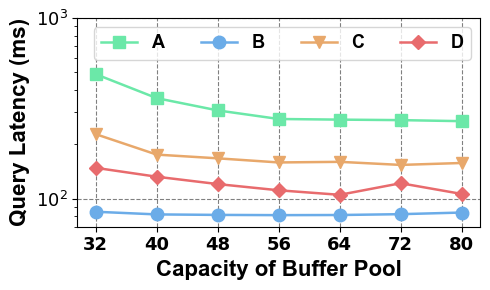

In [11]:
import matplotlib.pyplot as plt
import numpy as np

titile_font = {'family':'Arial', 'weight': 'bold', 'size': 16}
legende_font = {'family':'Arial', 'weight': 'bold', 'size': 13}

def draw_line(data, method_names, colors, markers, x_labels, y_min_max, filename='test.pdf'):
    """
    data: 是一个m*n二维数组,m是方法数量,n是x轴标签数量
    x_labels: x轴标签
    method_names: 方法名
    colors: 每个方法颜色
    markers: 方法的显示标记
    """

    # 我们先验证一下数据是不是符合规范的,不规范直接退出
    method_cnt = len(method_names)
    len_x = len(x_labels)
    if np.array(data).ndim != 2 or len(data[0]) != len_x or len(data) != method_cnt:
        print("wrong arguement, check them again")
        return
    
    plt.figure(figsize=(5, 3))
    plt.ylim(y_min_max[0], y_min_max[1])

    # plt.tick_params(labelsize=18)
    # 设置x和y轴数值显示字体大小
    plt.xticks(fontsize=13) 
    # 设置y轴数值显示字体大小为
    plt.yticks(fontsize=13)
    
    for i in range(method_cnt):
        # 由于*显示的比其他的小，这里加大一些
        if markers[i] == 'D':
            plt.plot(x_labels, data[i], label = method_names[i],color = colors[i], marker = markers[i],markersize = 7, linewidth = 1.8)
        else:
            plt.plot(x_labels, data[i], label = method_names[i],color = colors[i], marker = markers[i],markersize = 9, linewidth = 1.8)

    # 开始设置x和y轴标签和字体大小
    plt.ylabel('Query Latency (ms)', titile_font)
    plt.yscale('log')
    plt.xticks(fontweight='bold')
    plt.xlabel('Capacity of Buffer Pool', titile_font)
    # bbox_to_anchor=(0.1, 0.18), labelspacing = 0.35,handlelength=1.5,
    plt.legend(ncol = 4, prop=legende_font, labelspacing = 0.3)
    plt.grid(linestyle="--", color='gray')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

a = [488.814,360.072,307.936,276.038,273.808,272.066,268.478]
b = [84.566,81.75,81.248,80.996,81.13,82.004,83.724] 
c = [227.466,175.272,167.15,158.588,159.828,153.67,157.514]
d = [148.048,132.194,120.358,111.188,104.962,121.684,106.12]

data = [
    a,
    b,
    c,
    d
]
method_names=['A', 'B', 'C', 'D']
markers = ['s', 'o', 'v', 'D', '*']
# ['#d12023','#17b4ac', '#ed721f', '#289632', '#865f0c']
colors = ['#6be8a8', '#6bace8', '#e8a86b', '#e86b6d', '#e86bac']
x_labels = ['32','40','48', '56', '64', '72', '80']
y_min_max = [70, 1000]
draw_line(data, method_names, colors, markers, x_labels, y_min_max, 'test.pdf')